In [9]:
import os 
import glob 
import re 
import pandas as pd
import pickle
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D


In [40]:
data_dummy = pd.read_csv("Ouput_mpi_pop50_gen100_mut0.5_Dummy/Ouput_mpi_pop50_gen100_mut0.5.csv")
data_dummy_ref = pd.read_pickle(f'Ouput_mpi_pop50_gen100_mut0.5_Dummy/F_ref.pkl')

data_dummy_2 = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop100_gen100_mut0.5_Dummy/Ouput_mpi_pop100_gen100_mut0.5.csv")
data_dummy_ref_2 = pd.read_pickle("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop100_gen100_mut0.5_Dummy/F_ref.pkl")

data_pymechopt = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop50_gen100_mut0.5_PyOptMECH/Ouput_mpi_pop50_gen100_mut0.5.csv")
data_pymechopt_ref = pd.read_pickle(f'Ouput_mpi_pop50_gen100_mut0.5_PyOptMECH/F_ref.pkl')

data_pymechopt_2 = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop100_gen100_mut0.5_PyOptMECH/Ouput_mpi_pop100_gen100_mut0.5.csv")
data_pymechopt_ref_2 = pd.read_pickle(f'Ouput_mpi_pop100_gen100_mut0.5_PyOptMECH/F_ref.pkl')

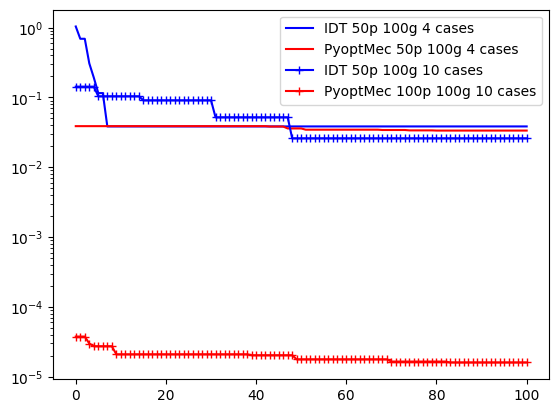

In [47]:
plt.plot(data_dummy["gen"],data_dummy["min"]/data_dummy_ref[0],"-b",label = "IDT 50p 100g 4 cases")
plt.plot(data_pymechopt["gen"],data_pymechopt["min"]/data_pymechopt_ref[0], '-r',label ="PyoptMec 50p 100g 4 cases")
plt.plot(data_dummy_2["gen"],data_dummy_2["min"]/data_dummy_ref_2[0], "-+b",label = "IDT 50p 100g 10 cases")
plt.plot(data_pymechopt_2["gen"],data_pymechopt_2["min"]/data_pymechopt_ref_2[0],"-+r",label ="PyoptMec 100p 100g 10 cases")
plt.legend()
plt.yscale("log")

Text(0.5, 1.0, 'Optimization on 110 cases with Fit : PyOptMech')

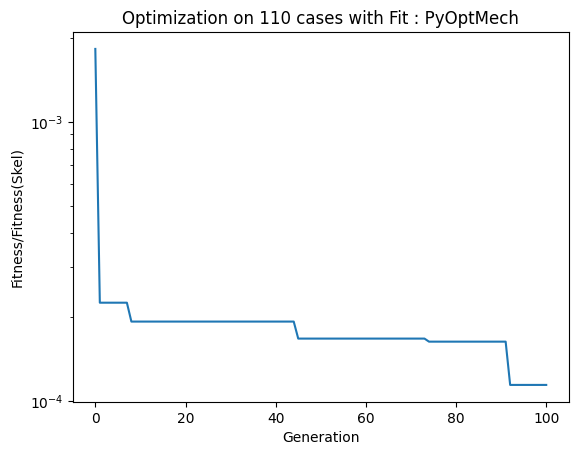

In [39]:
f110 = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop10_gen100_mut0.5_PyOptMECH_110f/Ouput_mpi_pop10_gen100_mut0.5.csv")
f100_ref = pd.read_pickle("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop10_gen100_mut0.5_PyOptMECH_110f/F_ref.pkl")

plt.plot(f110["gen"],f110["min"]/f100_ref[0])
plt.yscale("log")
plt.xlabel("Generation")
plt.ylabel("Fitness/Fitness(Skel)")
plt.title("Optimization on 110 cases with Fit : PyOptMech")

In [48]:
from Tools import *

In [49]:
Reduced = ct.Solution("/work/kotlarcm/WORK/V2/GA/reduced.yaml")
opt_pymechopt = ct.Solution("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop10_gen100_mut0.5_PyOptMECH_110f/Ouput_mpi_pop10_gen100_mut0.5.yaml")
opt_idt = ct.Solution("/work/kotlarcm/WORK/V2/GA/Ouput_mpi_pop10_gen100_mut0.5_Dummy_110f/Ouput_mpi_pop10_gen100_mut0.5.yaml")

In [50]:
_,factor_reduced = get_factor_dim(Reduced)
_,factor_opt_pymechopt = get_factor_dim(opt_pymechopt)
_,factor_opt_idt = get_factor_dim(opt_idt)

In [53]:
for a in factor_reduced : 
    print(a)

3800000000.0
0.0
33254432.0
880000000000.0
0.0
80228200.0
220000.0
1.51
14351120.0
104000000000.0
0.0
63956624.0
4530000000000000.0
-1.81
2058528.0
25000000000.0
0.23
-476976.0
2880.0
1.79
-7322000.0
2800.0
2.09
-6070984.0
70800000000.0
0.0
1234280.0
32500000000.0
0.0
0.0
1.93e+17
-2.49
2443456.0
1210000.0
1.24
-5468488.0
12300000000000.0
-1.2
0.0
4660000000.0
0.44
0.0
28600000000000.0
0.0
391078480.0
2890.0
2.23
43513600.0
0.0933
3.29
15355280.0
109.0
2.37
-757304.0
1200000000000.0
0.0
317996552.0
1290.0
2.18
6878496.000000001
7000000000.0
0.0
0.0
0.00086
4.01
6999832.0
3300.0
1.95
-907928.0
0.00564
3.53
2313752.0
1950000000000.0
-0.54
3502008.0
100000000000.0
-0.27
2702864.0
6040000000000000.0
-1.91
1280304.0
59100.0
1.59
-5744632.0
2190000.0
0.79
-5974752.0
43000000.0
0.29
-3623344.0
2.6e+16
-2.36
3640080.0
2600000000000000.0
-2.19
1903720.0
1200000000000.0
-0.5
0.0
165000000.0
0.71
3895304.0
8000.0
1.73
-2409984.0
9.57
2.46
447688.0
48200000000.0
0.02
397480.0
320000000000.0
-0.37


In [65]:
percentage_var = []
for i,j in zip(factor_reduced,factor_opt_pymechopt) : 
    if i == 0 : 
        value = 0
    else : 
        value = np.abs(i-j)/i *100
    percentage_var.append(value)
    
percentage_var2 = []
for i,j in zip(factor_reduced,factor_opt_idt) : 
    if i == 0 : 
        value = 0
    else : 
        value = np.abs(i-j)/i *100
    percentage_var2.append(value)
    
    

In [72]:
print("Ecart Opt with Fitness PymechOpt : ")
print("Moyenne")
print(np.mean(percentage_var))
print("Max")
print(np.max(percentage_var))
print("Ecart Opt with Fitness IDT : ")
print("Moyenne")
print(np.mean(percentage_var2))
print("Max")
print(np.max(percentage_var2))

Ecart Opt with Fitness PymechOpt : 
Moyenne
3.385257323753908
Max
20.000000000000007
Ecart Opt with Fitness IDT : 
Moyenne
4.778137438232376
Max
19.93119412921438
